### <center><font color=navy>Algorithmic Trading with Python</font></center>
### <center>Backtesting with Backtrader in Python</center>
#### <center>Ali Habibnia</center>

## Strategy optimization and backtesting

Optimization allows a strategist to improve upon the results of his strategy by fine tuning the parameters and the formulae that drive the strategy. Optimization can be done by fine tuning a single parameter or a set of parameters to achieve the desired optimization objective. An example of strategy optimization objective can be maximizing the total profits generated. Another objective of optimization can be minimizing the drawdowns.

Having mentioned the purpose of optimization, one should also be aware that optimization is like a double-edged sword. If many rules are applied on training data during optimization to achieve the desired equity curve, it results in over-fitting of the data and the model is likely to lose it forecasting ability on the test and future data.

In simple words, backtesting a trading strategy is the process of testing a trading hypothesis/strategy on prior time periods. Instead of applying a strategy for the time period forward (to judge performance), which could take years, a trader can simulate his or her trading strategy on relevant past data.

- ### Types of Backtesters

There are broadly two forms of backtesting system that are utilised to test this hypothesis; research back testers and event-driven back testers. Let’s go through them in detail now.

1. #### Research Backtesters

These tools do not fully simulate all aspects of market interaction but make approximations to provide a rapid determination of potential strategy performance. While these tools are frequently used for backtesting and execution, they are not suitable for strategies that approach intraday trading at higher frequencies. They are widely used within the professional quantitative trading industry to get the “first draft” for all strategy ideas before going for a rigorous backtest in a more realistic environment.

2. #### Event-Driven Backtesting

In event-driven backtesting, the automated trading strategy is connected to a real-time market feed and a broker, such that the system receives new market information which will be sent to a system which triggers an event to generate a new trading signal. These systems run in a continuous loop and can have sub-components such as historic data handler and brokerage simulator; allowing backtesting very similar to live execution. The only drawback is that these systems have a complicated design and are more prone to bugs.



# Backtesting with Backtrader in Python

Backtesting is a key component of effective trading system development. It is accomplished by reconstructing, with historical data, trades that would have occurred in the past using rules defined by a given strategy. The Backtrader library provides tools for conducting this kind of testing in Python.

Our overall approach is as follows:

1. Gathering Data.
2. Defining our Backtesting Strategy.
3. Extracting Performance Statistics to Compare and Contrast with the Benchmark.


## Example 1: Moving Average Crossover Strategy

In [1]:
! pip install backtrader >Null

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Ending Portfolio Value: 158856.28


<IPython.core.display.Javascript object>


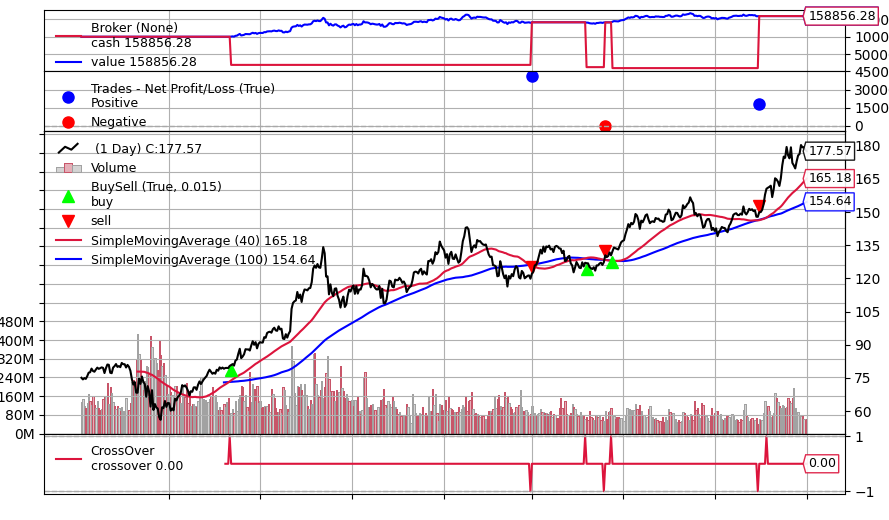

[[<Figure size 640x480 with 5 Axes>]]

In [2]:
import backtrader as bt
import yfinance as yf
import datetime

# Step 2: Create a Trading Strategy
class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ("short_window", 40),
        ("long_window", 100),
    )

    def __init__(self):
        self.data_close = self.datas[0].close
        self.short_ma = bt.indicators.SimpleMovingAverage(
            self.data_close, period=self.params.short_window
        )
        self.long_ma = bt.indicators.SimpleMovingAverage(
            self.data_close, period=self.params.long_window
        )
        self.crossover = bt.indicators.CrossOver(self.short_ma, self.long_ma)

    def next(self):
        if self.crossover > 0:  # if short MA crosses above long MA
            self.buy()
        elif self.crossover < 0:  # if short MA crosses below long MA
            self.sell()

# Step 3: Load Historical Data using yfinance
data_df = yf.download('AAPL', start='2020-01-01', end='2022-01-01')
data = bt.feeds.PandasData(dataname=data_df)

# Step 4: Set Up the Backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(MovingAverageCrossStrategy)
cerebro.adddata(data)
cerebro.broker.set_cash(100000)  # e.g. start with 100,000 cash

# Step 5: Add Additional Settings (Optional)
cerebro.addsizer(bt.sizers.FixedSize, stake=1000)
cerebro.broker.setcommission(commission=0.001)  # 0.1% commission (example)

# Step 6: Run the Backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Step 7: Visualize the Results
cerebro.plot()


The plot generated by Backtrader provides a visual representation of the trading strategy's performance over the backtesting period. Here's how to interpret the main components of the plot:

### 1. **Price Chart**
- **Candlestick/OHLC Bars**: Represent the open, high, low, and close prices of the asset for each period.
- **Moving Averages**: If used in your strategy, moving averages will be plotted over the price chart.
- **Buy/Sell Markers**: Arrows or markers indicate where the strategy executed buy or sell orders.

### 2. **Portfolio Value**
- **Cash**: The horizontal line represents the cash available in the brokerage account.
- **Portfolio Value**: The line graph shows the total portfolio value, including cash and the value of open positions, over time.

### 3. **Trades**
- **Closed Trades**: Dots or markers might indicate where trades were closed, depending on your plotting settings.

### 4. **Indicators**
- If you've used additional indicators (like MACD, RSI, etc.), they might be plotted in separate panels, showing their values over time.

### 5. **Zoom and Pan**
- You can zoom in/out and pan through the plot to inspect specific time frames in detail.

### How to Analyze:
- **Profitability**: Observe the Portfolio Value line to assess the strategy's profitability over time.
- **Drawdown**: Look for periods where the Portfolio Value decreases, indicating drawdowns.
- **Trade Execution**: Ensure that trades (buy/sell markers) are executed at the intended positions according to the strategy logic.
- **Indicator Behavior**: If using technical indicators, observe their behavior and ensure they are calculated as expected.
- **Overfitting**: Be cautious about overfitting. If the strategy performs exceptionally well in backtesting, it might be overfit to past data and may not perform well in live trading.

### Additional Tips:
- **Risk Management**: Ensure that the strategy adheres to sound risk management principles, like setting stop-loss levels and only risking a small percentage of the portfolio on a single trade.
- **Sensitivity**: Test how sensitive the strategy is to changes in parameters (like moving average periods) and ensure it is robust and not overly optimized to the tested period.
- **Out-of-Sample Testing**: Validate the strategy on out-of-sample data to verify its performance on unseen data.


Backtrader is a flexible Python library that allows you to create your own trading strategies by defining custom logic. It doesn’t come with predefined trading strategies per se, but it provides a robust framework and built-in indicators that enable you to define a wide variety of strategies.

Here are some types of strategies you might implement using Backtrader:


| Strategy                        | Short Description |
|:---------------------------------|:-------------------|
| Moving Average Crossover        | Buy/sell when a short-term moving average crosses a long-term moving average. |
| Mean Reversion                   | Trade based on the deviation of an asset price from its mean or another relevant benchmark. |
| Momentum                         | Buy/sell based on the acceleration of an asset’s price. |
| Bollinger Bands                  | Use volatility bands placed above and below a moving average to identify overbought/oversold conditions. |
| MACD                             | Utilize the convergence/divergence between two moving averages to generate trade signals. |
| RSI                              | Identify overbought/oversold conditions using the Relative Strength Index. |
| Pair Trading                     | Trade on the price ratio of two correlated assets. |
| Arbitrage                        | Exploit price discrepancies between related assets or markets. |
| Machine Learning-Based           | Use predictive models to generate trading signals. |
| Options Strategies               | Implement strategies using options, e.g., straddles, strangles, spreads. |
| Dollar-Cost Averaging            | Invest a fixed amount of money at regular intervals, regardless of the price. |
| Portfolio Balancing              | Rebalance a portfolio to maintain a desired allocation of assets. |
| Seasonality                      | Trade based on seasonal patterns or cycles in the market. |
| Statistical Arbitrage            | Use statistical methods to generate returns, like cointegration. |
| Trend Following                  | Identify and trade in the direction of the prevailing trend. |
| Volatility Breakout              | Trade based on sudden increases in volatility. |
| Stop Loss/Take Profit            | Implement strategies that use stop-loss or take-profit levels to manage trades. |
| Grid Trading                     | Buy/sell at predefined intervals (grid levels) without having to predict price direction. |
| Divergence Trading               | Identify divergence between price and an oscillator and trade upon it. |
| Hedging                          | Implement strategies that reduce potential losses in trading. |
| Multi-Timeframe Strategies       | Use multiple timeframes to make trading decisions. |
| Multi-Asset Strategies           | Trade strategies that involve multiple, possibly correlated, assets. |
| Market Making                    | Continuously quote buy and sell prices to profit from the bid-ask spread. |
| High-Frequency Trading           | Implement strategies that capitalize on small price gaps, usually with high leverage. |
| Order Flow                       | Trade based on the analysis of order flow information. |
| Sentiment Analysis               | Use sentiment analysis to make trading decisions. |
| Pattern Recognition              | Identify and trade based on recognized patterns (like head and shoulders, triangles, etc.) |
| Wyckoff Method                   | Trade based on the Wyckoff method principles of accumulation and distribution. |
| Elliott Wave Theory              | Trade based on the identification of market structures called "waves". |
| Fibonacci Retracements           | Use Fibonacci levels to identify potential reversal levels. |
| Pivot Points                     | Trade based on pivot points and their support/resistance levels. |
| Ichimoku Cloud                   | Use the Ichimoku cloud to identify trends and their strengths. |
| Heikin Ashi                      | Use Heikin Ashi candles to identify trends and reversals. |
| Gann Theory                      | Implement strategies based on W.D. Gann's theories, like the use of Gann angles. |
| Market Profile                   | Use market profile to understand price developments and areas of value in the market. |
| Volume Profile                   | Trade based on the distribution of volume at different price levels. |
| VWAP (Volume Weighted Average Price) | Implement strategies that aim to trade close to the VWAP. |
| TWAP (Time Weighted Average Price) | Implement strategies that aim to trade close to the TWAP. |
| Alpha and Beta                    | Develop strategies based on alpha (active return) and beta (sensitivity to market returns). |
| Risk Parity                       | Allocate capital based on risk, often using volatility as a proxy. |
| Smart Beta                        | Implement strategies that use alternative index construction rules. |
| Carry Trade                       | Implement strategies that aim to profit from the difference in yield between different securities. |
| Gamma Scalping                    | Implement strategies that aim to profit from changes in the delta of an option. |
| Delta Hedging                     | Implement strategies that aim to offset the price risk of a position. |
| Calendar Spreads                  | Implement strategies that involve creating a long and short position in two options with different expiration dates. |
| Butterfly Spreads                 | Implement strategies that involve multiple options trades with different strike prices. |
| Iron Condor                       | Implement strategies that involve four options with different strike prices. |
| Rolling Strategies                | Implement strategies that involve adjusting option positions. |
| Covered Call                      | Implement strategies that involve writing call options on an owned stock. |
| Protective Put                    | Implement strategies that involve buying put options as insurance against a decline in the owned stock. |
| Bull Call Spread                  | Implement strategies that involve buying and selling call options with the same expiration date but different strike prices. |
| Bear Put Spread                   | Implement strategies that involve buying and selling put options with the same expiration date but different strike prices. |
| Straddle                          | Implement strategies that involve buying or selling both a call and a put option with the same strike price and expiration date. |
| Strangle                          | Implement strategies that involve buying or selling both a call and a put option with the same expiration date but different strike prices. |
| Collar                            | Implement strategies that involve holding the underlying asset, while simultaneously buying a protective put and writing a covered call. |
| Condor                            | Implement strategies that involve four options contracts with the same expiration but different strike prices. |
| Box Spread                        | Implement strategies that involve a combination of a bull call spread and a bear put spread. |
| Ratio Spread                      | Implement strategies that involve buying and selling options in a certain ratio. |



## Example 2: Bollinger Bands and Relative Strength Index (RSI)

Let's create a more complex strategy using Bollinger Bands and Relative Strength Index (RSI) with Backtrader. This strategy will:
- Buy when the price closes below the lower Bollinger Band and RSI is below 30 (indicating an oversold condition).
- Sell when the price closes above the upper Bollinger Band and RSI is above 70 (indicating an overbought condition).


### Note:
- Ensure to validate the strategy with different data and under various scenarios to ensure its robustness.
- Be mindful that past performance is not indicative of future results, and backtesting should be one of many tools used when developing a trading strategy.
- Always adhere to sound risk management principles when developing trading strategies.

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Ending Portfolio Value: -756372.33


<IPython.core.display.Javascript object>


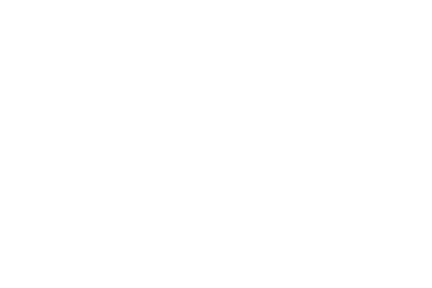

[[<Figure size 432x288 with 3 Axes>]]

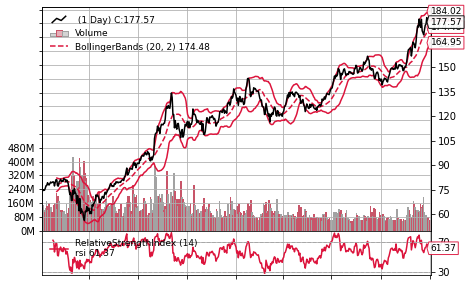

In [11]:
import backtrader as bt
import yfinance as yf
import datetime

# Create a Strategy
class BollingerRSIStrategy(bt.Strategy):
    params = (
        ("bband_period", 20),
        ("rsi_period", 14),
        ("overbought", 70),
        ("oversold", 30),
        ("stddev", 2),
    )

    def __init__(self):
        self.bband = bt.indicators.BollingerBands(
            self.data.close, period=self.params.bband_period, devfactor=self.params.stddev
        )
        self.rsi = bt.indicators.RelativeStrengthIndex(
            period=self.params.rsi_period
        )

    def next(self):
        if self.data.close < self.bband.lines.bot and self.rsi < self.params.oversold:
            self.buy()
        elif self.data.close > self.bband.lines.top and self.rsi > self.params.overbought:
            self.sell()

# Download historical data
data_df = yf.download('AAPL', start='2020-01-01', end='2022-01-01')
data = bt.feeds.PandasData(dataname=data_df)

# Create a Cerebro entity
cerebro = bt.Cerebro(stdstats=False)

# Add a strategy
cerebro.addstrategy(BollingerRSIStrategy)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.set_cash(100000.0)

# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=1000)

# Set the commission
cerebro.broker.setcommission(commission=0.001)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the result
cerebro.plot(iplot=True)

### Short Note on Understanding Performance and Risk Metrics in Trading

In trading, evaluating the effectiveness and risk of a strategy is crucial. Performance metrics help assess the profitability and consistency of a strategy, while risk metrics provide insights into its potential vulnerabilities. Let’s delve into some key metrics in both categories.

#### Part 1: Performance Metrics

1. **Return Measures**
   - **Total P/L**: Evaluates the overall profit or loss of a strategy.
   - **Average P/L**: Indicates the average profit or loss per unit of time.
   - **Success Ratio (Hit-rate)**: Represents the proportion of profitable trades to losing ones.

2. **Risk-Adjusted Measures**
   - **Sharpe Ratio**: Assesses excess return per unit of risk, but has limitations like assuming future patterns will mimic the past.
   - **Sortino Ratio**: A variation of Sharpe Ratio, focusing on the standard deviation of negative returns.
   - **Calmar Ratio**: Considers the average annual rate of return over three years against the maximum drawdown during the same period.

3. **Relative Return Measures**
   - **Up/Down Capture Ratio**: Compares fund’s return to benchmark’s return during its upward/downward movements.
   - **Up/Down Percentage Ratio**: Measures how often a fund outperforms the benchmark during its positive/negative periods.

#### Part 2: Risk Metrics

1. **Basic Risk Metrics**
   - **Variance**: Indicates how much the return deviates from the expected, reflecting asset volatility.
   - **Maximum Drawdown**: Represents the largest loss from peak to trough, expressed as a percentage.

2. **Relative Risk Measures**
   - **Correlation Coefficient**: Shows the strength and direction of the linear relationship between two variables.
   - **Beta**: Measures a portfolio's volatility in relation to the market.

3. **Tail Risk Measures**
   - **Value-at-Risk (VaR)**: Estimates the potential loss over a defined period and confidence interval.
   - **Conditional Value-at-Risk (CVaR)**: Averages between VaR and losses exceeding VaR, providing a more comprehensive risk assessment.

Understanding and implementing these metrics will empower traders to evaluate and refine their strategies, balancing the pursuit of returns against prudent risk management. Always consider the limitations and applicability of each metric to ensure they align with your trading style and objectives.

Python offers several libraries to compute performance and risk metrics for trading strategies. Below are some of the notable ones:


### 1. `pyfolio`

`pyfolio` is a Python library for performance and risk analysis of financial portfolios developed by Quantopian Inc. It provides functionality to visualize various aspects of performance and risk, and it also has built-in functions to compute many common performance metrics like Sharpe ratio, Sortino ratio, and many more.


### 2. `ffn` - Financial Functions for Python

`ffn` is a library that contains many useful functions for those who work in quantitative finance. It also allows you to calculate performance metrics like the Calmar ratio, max drawdown, and many more with just a few lines of code.


### 3. `empyrical`

`empyrical` is another library developed by Quantopian that provides various financial risk and performance metrics. It's quite easy to use and can calculate metrics like Sharpe ratio, Sortino ratio, etc.


### 4. `bt` - Backtesting for Python

`bt` is a flexible backtesting library for Python used to test quantitative trading strategies. It also allows you to calculate various risk and performance metrics.


### 5. `Quantlib`

`Quantlib` is more focused on derivatives and quantitative finance calculations but can be adapted for various financial calculations and is widely used in finance for complex quantitative methods.
